In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

AttributeError: module 'tensorflow_datasets.core' has no attribute 'utils'

#### Load Dataset

In [ ]:
dataset,metadate=tfds.load("mnist",as_supervised=True,with_info=True)
metadate

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...:  50%|█████     | 2/4 [00:00<00:01,  1.68 url/s]

Dl Completed...:  75%|███████▌  | 3/4 [00:01<00:00,  1.88 url/s]

Dl Completed...: 100%|██████████| 4/4 [00:04<00:00,  1.23s/ url]

Dl Completed...: 100%|██████████| 4/4 [00:05<00:00,  1.40s/ url]


Dataset mnist downloaded and prepared to C:\Users\Reham Essa\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='C:\\Users\\Reham Essa\\tensorflow_datasets\\mnist\\3.0.1',
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

In [ ]:
train_dataset,test_dataset=dataset["train"],dataset["test"]

#### normalization

In [ ]:
# convert type of image from int to float to minimize weight
def normalize(images,labels):
    images=tf.cast(images,tf.float32)
    images /=255
    return images,labels
train_dataset=train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)    

#### Visualization

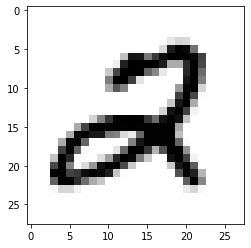

In [ ]:
for image ,label in test_dataset.take(1):
    break
image=image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.show()

#### Divide Data into batches

In [ ]:
BATCH_SIZE=32
train_dataset=train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
tEST_dataset=test_dataset.cache().batch(BATCH_SIZE)


#### MODEL CREATION

In [ ]:
model=tf.keras.Sequential(
    [
        tf.keras.layers.Conv2D(32,(3,3),padding="same",activation=tf.nn.relu,input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D((2,2),strides=2),

        tf.keras.layers.Conv2D(64,(3,3),padding="same",activation=tf.nn.relu,input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D((2,2),strides=2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation=tf.nn.relu),
        tf.keras.layers.Dense(10)

    ]
)

#### Compile Model

In [ ]:
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

#### training

In [ ]:
hist=model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(60000/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 55s 28ms/step - loss: 0.1229 - accuracy: 0.9621
Epoch 2/5
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0410 - accuracy: 0.9870
Epoch 3/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0262 - accuracy: 0.9922
Epoch 4/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0212 - accuracy: 0.9932
Epoch 5/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0142 - accuracy: 0.9957


#### Accuracry

In [ ]:
test_loss,test_accuracy=model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))

ValueError: in user code:

    File "C:\Users\Reham Essa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1525, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Reham Essa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1514, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Reham Essa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1507, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Reham Essa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1471, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\Reham Essa\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "max_pooling2d_2" (type MaxPooling2D).
    
    Negative dimension size caused by subtracting 2 from 1 for '{{node sequential/max_pooling2d_2/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential/conv2d_2/Relu)' with input shapes: [28,28,1,32].
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(28, 28, 1, 32), dtype=float32)


In [ ]:
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x0000014964564220>>